In [10]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/wage.csv', sep=";", index_col=False).round(2)
df 

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1
...,...,...,...,...
993,35.42,18,23,1
994,36.84,16,7,1
995,41.32,16,11,1
996,47.22,18,35,1


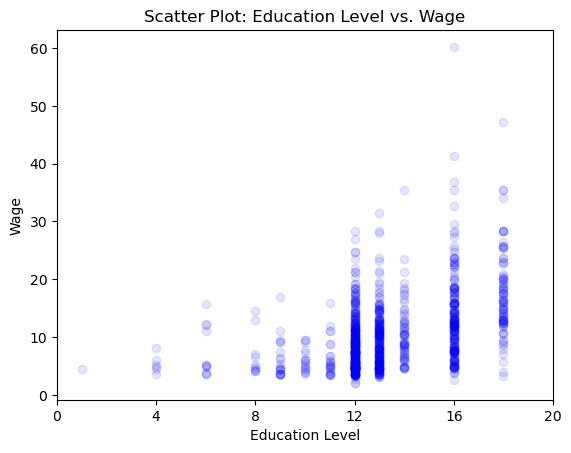

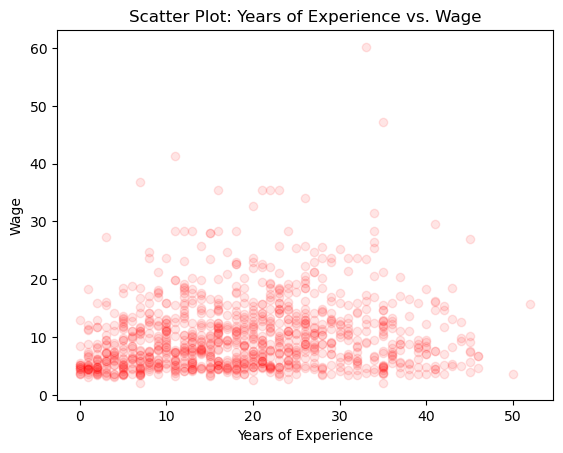

In [12]:
# Scatter-Plot von 'educ' gegen 'wage'
plt.scatter(df['educ'], df['wage'], alpha=0.1, color='b')
plt.xlabel('Education Level')
plt.ylabel('Wage')#
plt.xticks(np.arange(0, 21, step=4))  # Festlegen der x-Achsenticks von 0 bis 20 in Schritten von 2
plt.title('Scatter Plot: Education Level vs. Wage')
plt.show()

# Scatter-Plot von 'exper' gegen 'wage'
plt.scatter(df['exper'], df['wage'], alpha=0.1, color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Wage')
plt.title('Scatter Plot: Years of Experience vs. Wage')
plt.show()


In [13]:
X = df[['educ', 'exper']]
y = df[['wage']]
X.head()


,educ,exper
0,12,7
1,12,35
2,16,20
3,12,24
4,13,4


In [14]:
def train_test_valid_split(df, train_size, test_size, valid_size_min, valid_size_max):
    """Function to split the data into train, test, and validation sets.

    Input:
    - df: Pandas DataFrame containing the data.
    - train_size: Number of rows to be used as training data.
    - test_size: Number of rows to be used as test data.
    - valid_size_min: Minimum number of rows to be used as validation data.
    - valid_size_max: Maximum number of rows to be used as validation data.

    Output:
    - A split of the data into train, test, and validation sets.
    """
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size, -1]
    X_valid, y_valid = X.iloc[valid_size_min:valid_size_max], y.iloc[valid_size_min:valid_size_max, -1]
    X_test, y_test = X.iloc[test_size:], y.iloc[test_size:, -1]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Example usage
X_train, y_train, X_valid, y_valid, X_test, y_test = train_test_valid_split(df, train_size=700, test_size=900, valid_size_min=700, valid_size_max=900)


# X_train, y_train = X.iloc[:700], y.iloc[:700, -1]
# X_valid, y_valid = X.iloc[700:900], y.iloc[700:900, -1]
# X_test, y_test = X.iloc[900:], y.iloc[900:, -1]


In [15]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)
print("X_train ", type(X_train), "y_train type:", type(y_train), 
      "X_test type:",type(X_test), "X_test type:",type(y_test), 
      "X_val", type(X_valid), "y_val", type(y_valid))

Der X Test Datensatz besthet aus:  (700, 2) Der Y Test Datensatz besthet aus:  (700,)
Der X_test Datensatz besthet aus:  (98, 2) Der y_test Datensatz besteht  aus:  (98,)
X_train  <class 'pandas.core.frame.DataFrame'> y_train type: <class 'pandas.core.series.Series'> X_test type: <class 'pandas.core.frame.DataFrame'> X_test type: <class 'pandas.core.series.Series'> X_val <class 'pandas.core.frame.DataFrame'> y_val <class 'pandas.core.series.Series'>


In [16]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

158.0

# Model 1 

In [17]:
from keras.layers import BatchNormalization
model = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(1, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Beispiel für das Modelltraining
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
history

Epoch 1/20
 1/22 [>.............................] - ETA: 2s - loss: 1385.2035

2024-03-05 16:05:27.827079: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/22 [==============================] - 0s 3ms/step - loss: 1205.7256 - val_loss: 1902.7415
Epoch 2/20
22/22 [==============================] - 0s 1ms/step - loss: 970.5959 - val_loss: 1577.3690
Epoch 3/20
22/22 [==============================] - 0s 1ms/step - loss: 772.9043 - val_loss: 1295.6741
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: 607.2343 - val_loss: 1059.4067
Epoch 5/20
22/22 [==============================] - 0s 962us/step - loss: 471.3166 - val_loss: 863.2736
Epoch 6/20
22/22 [==============================] - 0s 967us/step - loss: 361.4328 - val_loss: 702.5591
Epoch 7/20
22/22 [==============================] - 0s 1ms/step - loss: 274.9850 - val_loss: 569.4151
Epoch 8/20
22/22 [==============================] - 0s 968us/step - loss: 207.0631 - val_loss: 461.4773
Epoch 9/20
22/22 [==============================] - 0s 937us/step - loss: 154.6964 - val_loss: 375.5382
Epoch 10/20
22/22 [==============================] - 0s 1ms/step - loss: 115.313

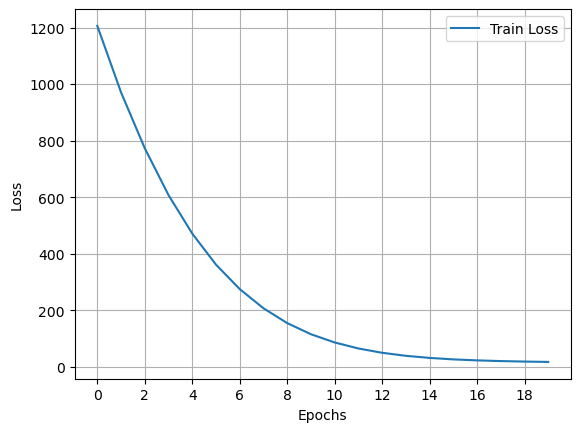

In [19]:
def create_plt_loss(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

create_plt_loss(history, x_tick_min = 0, 
                x_tick_max =  20, x_tick_step=2)

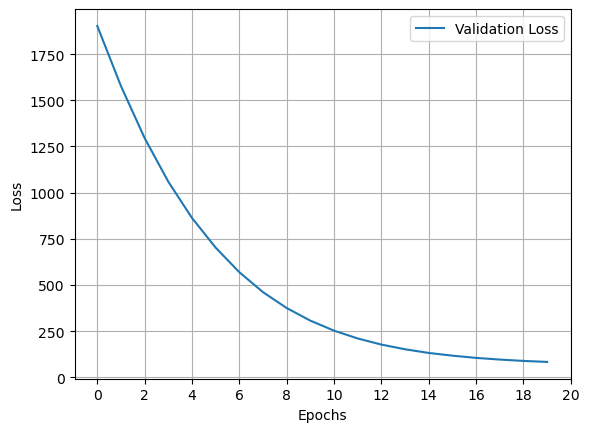

In [20]:
def create_plt_val_los(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

    
create_plt_val_los(history, x_tick_min = 0,x_tick_max=22, x_tick_step=2)

In [21]:
# Beispiel für die Modellbewertung
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


4/4 [==============================] - 0s 690us/step - loss: 372.1376
Test Loss: 372.1376037597656


In [22]:
predictions = model.predict(X_test)
predictions.shape

4/4 [==============================] - 0s 683us/step


(98, 1)

In [23]:
y_test.shape, predictions.shape

((98,), (98, 1))

In [24]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions.flatten()
})
results_df

,True Values,Predicted Values
0,18.23,6.373304
1,18.27,0.947082
2,18.33,10.624848
3,18.39,4.023947
4,18.42,7.059028
...,...,...
93,35.42,6.325594
94,36.84,2.461659
95,41.32,3.439570
96,47.22,9.259329


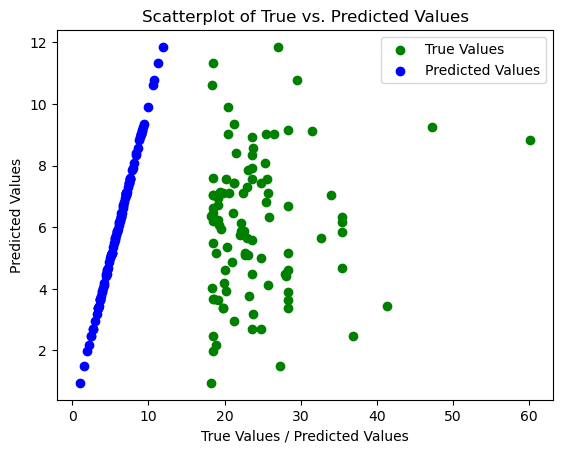

In [25]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df["True Values"], results_df["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df["Predicted Values"], results_df["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Ende Model 1

# Model 2 

2 Model: LSTM

In [33]:
# Model infrastructure
model_2 = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1), name='Input'),
    LSTM(units=2, return_sequences=True, activation="relu", name='layer1'),
    LSTM(units=2, activation="relu", name='layer2'),
    Dense(units=1, name='Output')
])

    

In [34]:
model_2.compile(optimizer='adam', loss='mean_squared_error')     
model_2.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 2, 2)              32        
                                                                 
 layer2 (LSTM)               (None, 2)                 40        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
history_2

Epoch 1/20
22/22 [==============================] - 1s 8ms/step - loss: 55.9963 - val_loss: 212.6318
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 55.6884 - val_loss: 211.9956
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 55.3783 - val_loss: 211.3680
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 55.0739 - val_loss: 210.7332
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 54.7683 - val_loss: 210.1032
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 54.4649 - val_loss: 209.4763
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 54.1617 - val_loss: 208.8557
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 53.8613 - val_loss: 208.2340
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 53.5629 - val_loss: 207.6102
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 53.2645 - val_loss

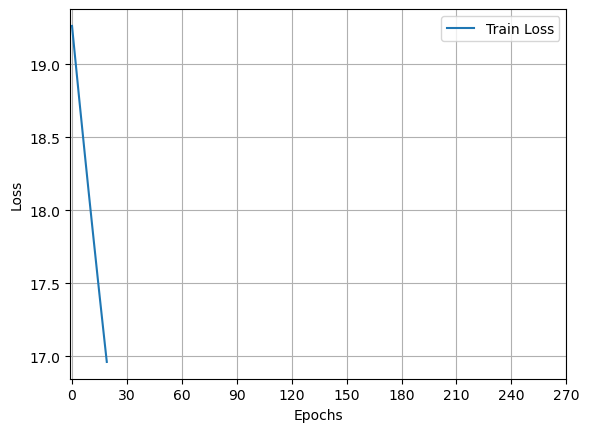

In [30]:
create_plt_loss(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)

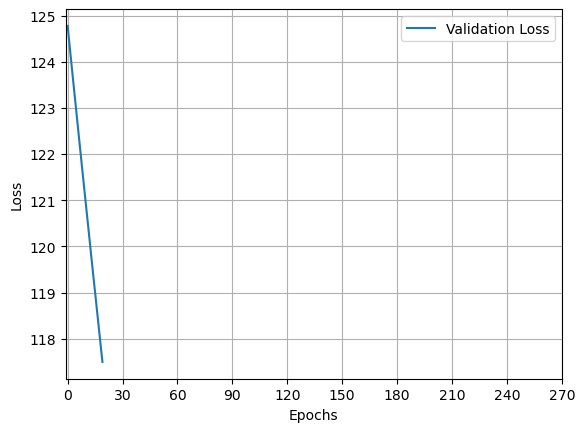

In [31]:
create_plt_val_los(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)  

In [32]:
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

4/4 [==============================] - 0s 1ms/step - loss: 456.6984
Test Loss of Model 1: 372.1376037597656
Test Loss of Model 2: 456.6983947753906


In [36]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

4/4 [==============================] - 0s 1ms/step


(98, 1)

In [37]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df_2 = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions_2.flatten()
})
results_df_2

,True Values,Predicted Values
0,18.23,0.43315
1,18.27,0.43315
2,18.33,0.43315
3,18.39,0.43315
4,18.42,0.43315
...,...,...
93,35.42,0.43315
94,36.84,0.43315
95,41.32,0.43315
96,47.22,0.43315


In [38]:
results_df_2.columns

Index(['True Values', 'Predicted Values'], dtype='object')

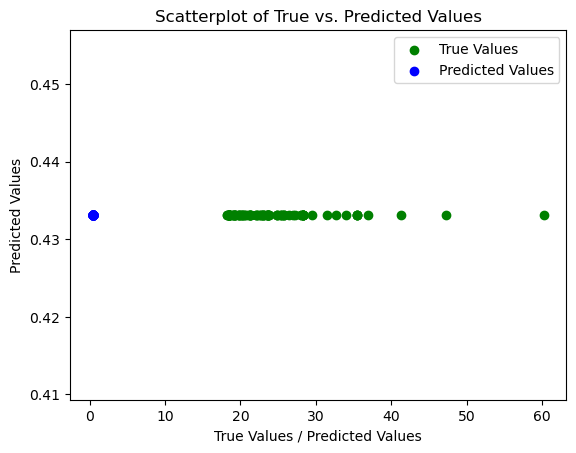

In [39]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df_2["True Values"], results_df_2["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df_2["Predicted Values"], results_df_2["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Model 3

In [40]:
model_3 = keras.models.Sequential([ 
    keras.layers.SimpleRNN(2, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="relu", name="Input"),
    keras.layers.SimpleRNN(20, return_sequences=True, activation="relu", name="layer1"),
    keras.layers.SimpleRNN(3, return_sequences=False, activation="relu", name="layer2"),
    keras.layers.Dense(1, name='Output')
])
model_3.compile(loss="mean_squared_error", optimizer="adam")  
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (SimpleRNN)           (None, 2, 2)              8         
                                                                 
 layer1 (SimpleRNN)          (None, 2, 20)             460       
                                                                 
 layer2 (SimpleRNN)          (None, 3)                 72        
                                                                 
 Output (Dense)              (None, 1)                 4         
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.compile(loss="mean_squared_error", optimizer="adam")   
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) #batch_Size = 1
history_3

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 56.2379 - val_loss: 212.6342
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 55.6894 - val_loss: 212.0009
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 55.3827 - val_loss: 211.3695
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 55.0762 - val_loss: 210.7425
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 54.7732 - val_loss: 210.1118
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 54.4690 - val_loss: 209.4873
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 54.1674 - val_loss: 208.8624
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 53.8668 - val_loss: 208.2403
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 53.5677 - val_loss: 207.6192
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 53.2708 - val_loss

In [42]:
test_loss_3 = model_3.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)

4/4 [==============================] - 0s 946us/step - loss: 615.2289
Test Loss of Model 1: 372.1376037597656
Test Loss of Model 2: 456.6983947753906
Test Loss of Model 3: 615.2289428710938


In [ ]:
create_plt_loss(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

In [ ]:
create_plt_val_los(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

# Model 4
Ein paper das besagt das dropouts model immer besser machen 
[text](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,)

In [ ]:
# Model infrastructure
model_4 = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(30, activation="relu", name="layer1"),
    Dropout(0.001),
    Dense(40, name="layer2"),
    Dense(1, name="Output"),
])



optimizer_4 = Adam(learning_rate=0.001)  # Default learning rate
model_4.compile(loss='mean_squared_error', optimizer=optimizer_4)  # Using MSE for loss and MAE for metrics
model_4.summary()

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=33, validation_data=(X_valid, y_valid))
history_4

In [ ]:
test_loss_4 = model_4.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)
print("Test Loss of Model 4:", test_loss_4)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

# New Dataset housing

In [ ]:
df_housing = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/housing.csv', sep=",", index_col=False).round(2)
df_housing

In [ ]:
df_housing.isnull().sum()
df_housing = df_housing.dropna()
df_housing.isnull().sum()


In [ ]:
df_housing.columns
X = df_housing[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]   
y = df_housing[['median_house_value']]

In [ ]:
X_train,y_train,X_valid,y_valid,X_test,y_test = train_test_valid_split(df_housing, train_size=7500, test_size=1600, valid_size_min=1400, valid_size_max=2000)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

In [ ]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

In [ ]:
X_train.shape

In [ ]:
model_housing = Sequential([
    InputLayer(input_shape=[None, 7500, 5], name="Input"),
    Dense(20, activation="relu", name="layer1"),
    Dense(30, activation="relu", name="layer2"),
    Dense(8, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model_housing.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model_housing.summary()

In [ ]:
history_housing = model_housing.fit(X_train,y_train, epochs=5)
history_housing

In [ ]:
50237677568.0000
21635821568.0000

In [ ]:
create_plt_loss(history_housing, x_tick_min = 0,x_tick_max=5, x_tick_step=1)